In [2]:
import gensim
from gensim.models import Word2Vec
import json
import gensim.downloader as api
from sklearn.cluster import DBSCAN
from pyclustering.cluster.dbscan import dbscan
import numpy as np

import os
import tensorflow as tf
from tensorflow.contrib.tensorboard.plugins import projector

import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA

## Read the sentences list

In [1]:
sentences = []
with open('../../Preprocess_venue/venues_unique.', 'r') as f:
    sentences = json.loads(f.read())
print(len(sentences))

FileNotFoundError: [Errno 2] No such file or directory: 'fos_list_reduced_5.txt'

In [3]:
model = api.load('glove-wiki-gigaword-100')

In [9]:
X = []
wrong_words = 0
total_words = 0
len_lower = 0

new_sentences = []

for sentence in sentences:
    word_vector = []
    new_sentence = []
    for word in sentence:
        total_words += 1
        try:
            word_vector.append(model[word])
            new_sentence.append(word)
        except:
            wrong_words += 1
    leng = len(word_vector)
    
    avg_vect = np.zeros(100)    
    if (leng > 0):
        X.append(avg_vect)
        for elem in word_vector:
            for i in range(0,100):
                avg_vect[i] += elem[i]
        
        if (leng != 1):
            for i in range(0,100):
                avg_vect[i] /= leng 
            
        new_sentences.append(new_sentence)

In [10]:
print("len(new_sentences)",len(new_sentences))
print("total_words",total_words)
print("X",len(X))
print("wrong_words",wrong_words)

len(new_sentences) 3593
total_words 10689
X 3593
wrong_words 234


In [50]:
X = np.array(X)
np.save('X1.npy', X) 

In [3]:
X = np.load('X1.npy')

## Apply DBScan

In [38]:
eps = [1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,
      2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,
      3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,
      4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,
      5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,
      6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,
      7.0,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,
      8.0,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,
      9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,
      10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9]
i = 0
while i < 100:
    min_s = 1
    while min_s < 10:
        clustering = DBSCAN(eps=eps[i], min_samples=min_s).fit(X)
        l = []
        cl = clustering.labels_
        min_ones = 0
        for element in cl:
            if element == -1:
                min_ones = min_ones + 1
            else:
                if element not in l:
                    l.append(element)
        print('eps=' + str(eps[i]) + ' min_s=' + str(min_s) + ' nr_clusters=' + str(len(l)) + ' nr_-1=' + str(min_ones))
        min_s = min_s + 1
    i = i + 1

eps=1.0 min_s=1 nr_clusters=3219 nr_-1=0
eps=1.0 min_s=2 nr_clusters=50 nr_-1=3169
eps=1.0 min_s=3 nr_clusters=5 nr_-1=3259
eps=1.0 min_s=4 nr_clusters=1 nr_-1=3272
eps=1.0 min_s=5 nr_clusters=1 nr_-1=3272
eps=1.0 min_s=6 nr_clusters=1 nr_-1=3272
eps=1.0 min_s=7 nr_clusters=1 nr_-1=3272
eps=1.0 min_s=8 nr_clusters=1 nr_-1=3272
eps=1.0 min_s=9 nr_clusters=1 nr_-1=3272
eps=1.1 min_s=1 nr_clusters=3196 nr_-1=0
eps=1.1 min_s=2 nr_clusters=68 nr_-1=3128
eps=1.1 min_s=3 nr_clusters=8 nr_-1=3248
eps=1.1 min_s=4 nr_clusters=2 nr_-1=3266
eps=1.1 min_s=5 nr_clusters=1 nr_-1=3272
eps=1.1 min_s=6 nr_clusters=1 nr_-1=3272
eps=1.1 min_s=7 nr_clusters=1 nr_-1=3272
eps=1.1 min_s=8 nr_clusters=1 nr_-1=3272
eps=1.1 min_s=9 nr_clusters=1 nr_-1=3272
eps=1.2 min_s=1 nr_clusters=3133 nr_-1=0
eps=1.2 min_s=2 nr_clusters=111 nr_-1=3022
eps=1.2 min_s=3 nr_clusters=22 nr_-1=3200
eps=1.2 min_s=4 nr_clusters=4 nr_-1=3258
eps=1.2 min_s=5 nr_clusters=2 nr_-1=3267
eps=1.2 min_s=6 nr_clusters=1 nr_-1=3272
eps=1.2 min

eps=3.2 min_s=4 nr_clusters=1 nr_-1=76
eps=3.2 min_s=5 nr_clusters=1 nr_-1=80
eps=3.2 min_s=6 nr_clusters=1 nr_-1=80
eps=3.2 min_s=7 nr_clusters=1 nr_-1=85
eps=3.2 min_s=8 nr_clusters=1 nr_-1=87
eps=3.2 min_s=9 nr_clusters=1 nr_-1=90
eps=3.3 min_s=1 nr_clusters=49 nr_-1=0
eps=3.3 min_s=2 nr_clusters=3 nr_-1=46
eps=3.3 min_s=3 nr_clusters=1 nr_-1=50
eps=3.3 min_s=4 nr_clusters=1 nr_-1=54
eps=3.3 min_s=5 nr_clusters=1 nr_-1=55
eps=3.3 min_s=6 nr_clusters=1 nr_-1=55
eps=3.3 min_s=7 nr_clusters=1 nr_-1=55
eps=3.3 min_s=8 nr_clusters=1 nr_-1=55
eps=3.3 min_s=9 nr_clusters=1 nr_-1=57
eps=3.4 min_s=1 nr_clusters=36 nr_-1=0
eps=3.4 min_s=2 nr_clusters=3 nr_-1=33
eps=3.4 min_s=3 nr_clusters=1 nr_-1=37
eps=3.4 min_s=4 nr_clusters=1 nr_-1=39
eps=3.4 min_s=5 nr_clusters=1 nr_-1=40
eps=3.4 min_s=6 nr_clusters=1 nr_-1=40
eps=3.4 min_s=7 nr_clusters=1 nr_-1=41
eps=3.4 min_s=8 nr_clusters=1 nr_-1=41
eps=3.4 min_s=9 nr_clusters=1 nr_-1=41
eps=3.5 min_s=1 nr_clusters=29 nr_-1=0
eps=3.5 min_s=2 nr_cluste

KeyboardInterrupt: 

## Test DBScan

In [52]:
clustering = DBSCAN(eps=3.7, min_samples=1).fit(X)
cl = clustering.labels_

# Gaseste numarul de clustere
clust = []
noise = 0

for elem in cl: 
    if elem == -1:
        noise += 1
    else:
        if elem not in clust:
            clust.append(elem)

clustere = np.zeros(len(clust), dtype=np.int64)     
for elem in cl:
    if not ( elem == -1):
        clustere[elem] += 1 
        
print(clustere)

[3629    1    1    1    1    1    1    1    1    1    1    1    1    1
    1]


## Apply DBScan 2

In [53]:
sample = X

eps = [1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,
      2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,
      3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,
      4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,
      5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,
      6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,
      7.0,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,
      8.0,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,
      9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,
      10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9]
i = 0
while i < 100:
    min_s = 1
    while min_s < 10:

        dbscan_instance = dbscan(sample, eps[i], min_s)
        dbscan_instance.process()
        clusters = dbscan_instance.get_clusters()
        noise = dbscan_instance.get_noise()
        print(str(eps[i]) + ' ' + str(min_s) + ' clusters=' + str(len(clusters)) + ' noise=' + str(len(noise)))
        min_s += 1
    
    i += 1


1.0 1 clusters=50 noise=3169
1.0 2 clusters=5 noise=3259
1.0 3 clusters=1 noise=3272
1.0 4 clusters=1 noise=3272
1.0 5 clusters=1 noise=3272
1.0 6 clusters=1 noise=3272
1.0 7 clusters=1 noise=3272
1.0 8 clusters=1 noise=3272
1.0 9 clusters=1 noise=3272
1.1 1 clusters=68 noise=3128
1.1 2 clusters=8 noise=3248
1.1 3 clusters=2 noise=3266
1.1 4 clusters=1 noise=3272
1.1 5 clusters=1 noise=3272
1.1 6 clusters=1 noise=3272
1.1 7 clusters=1 noise=3272
1.1 8 clusters=1 noise=3272
1.1 9 clusters=1 noise=3272
1.2 1 clusters=111 noise=3022
1.2 2 clusters=22 noise=3200
1.2 3 clusters=4 noise=3258
1.2 4 clusters=2 noise=3267
1.2 5 clusters=1 noise=3272
1.2 6 clusters=1 noise=3272
1.2 7 clusters=1 noise=3272
1.2 8 clusters=1 noise=3272
1.2 9 clusters=1 noise=3272
1.3 1 clusters=141 noise=2927
1.3 2 clusters=33 noise=3143
1.3 3 clusters=11 noise=3220
1.3 4 clusters=4 noise=3251
1.3 5 clusters=3 noise=3260
1.3 6 clusters=1 noise=3272
1.3 7 clusters=1 noise=3272
1.3 8 clusters=1 noise=3272
1.3 9 clust

KeyboardInterrupt: 

## Test DBScan 2

In [157]:
dbscan_instance = dbscan(sample, 2.5, 2)
dbscan_instance.process()
clusters = dbscan_instance.get_clusters()
noise = dbscan_instance.get_noise()

clust = np.zeros(len(clusters))
index = 0
for elem in clusters:
    print(index, len(elem))
    index += 1

0 2434
1 5
2 8
3 3
4 3
5 3


## OPTICS Algorithm

In [67]:
from pyclustering.cluster.optics import optics
from pyclustering.cluster import cluster_visualizer

# Read sample for clustering from some file.
sample = X

# Run cluster analysis where connectivity radius is bigger than real.
radius = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,
        1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,
      2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,
      3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,
      4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,
      5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,
      6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,
      7.0,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,
      8.0,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,
      9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,
      10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9]

i = 0
while i < 100:
    neighbors = 1
    while neighbors < 10:
        optics_instance = optics(sample, radius[i], neighbors)

        # Performs cluster analysis.
        optics_instance.process()

        # Obtain results of clustering.
        clusters = optics_instance.get_clusters()
        noise = optics_instance.get_noise()
        print ( str(radius[i]) + " " + str(neighbors) + " " + str(len(clusters)) + " " + str(len(noise)))
        neighbors += 1
    i += 1

0.1 1 32 3209
0.1 2 2 3269
0.1 3 1 3272
0.1 4 1 3272
0.1 5 1 3272
0.1 6 1 3272
0.1 7 1 3272
0.1 8 1 3272
0.1 9 1 3272
0.2 1 32 3209
0.2 2 2 3269
0.2 3 1 3272
0.2 4 1 3272
0.2 5 1 3272
0.2 6 1 3272
0.2 7 1 3272
0.2 8 1 3272
0.2 9 1 3272
0.3 1 32 3209
0.3 2 2 3269
0.3 3 1 3272
0.3 4 1 3272
0.3 5 1 3272
0.3 6 1 3272
0.3 7 1 3272
0.3 8 1 3272
0.3 9 1 3272
0.4 1 32 3209
0.4 2 2 3269
0.4 3 1 3272
0.4 4 1 3272
0.4 5 1 3272
0.4 6 1 3272
0.4 7 1 3272
0.4 8 1 3272
0.4 9 1 3272
0.5 1 32 3209
0.5 2 2 3269
0.5 3 1 3272
0.5 4 1 3272
0.5 5 1 3272
0.5 6 1 3272
0.5 7 1 3272
0.5 8 1 3272
0.5 9 1 3272
0.6 1 32 3209
0.6 2 2 3269
0.6 3 1 3272
0.6 4 1 3272
0.6 5 1 3272
0.6 6 1 3272
0.6 7 1 3272
0.6 8 1 3272
0.6 9 1 3272
0.7 1 34 3205
0.7 2 2 3269
0.7 3 1 3272
0.7 4 1 3272
0.7 5 1 3272
0.7 6 1 3272
0.7 7 1 3272
0.7 8 1 3272
0.7 9 1 3272
0.8 1 36 3201
0.8 2 2 3269
0.8 3 1 3272
0.8 4 1 3272
0.8 5 1 3272
0.8 6 1 3272
0.8 7 1 3272
0.8 8 1 3272
0.8 9 1 3272
0.9 1 41 3190
0.9 2 3 3267
0.9 3 1 3272
0.9 4 1 3272
0.9

KeyboardInterrupt: 

## Test OPTICS

In [77]:
optics_instance = optics(sample, 2.9, 1)
#2.5 1
#2.5 2
#2.6 1
#2.7 1
#2.8 1
#2.9 1 

# Performs cluster analysis.
optics_instance.process()

# Obtain results of clustering.
clusters = optics_instance.get_clusters()
noise = optics_instance.get_noise()

print(len(clusters))
print(len(noise))
l_clusters = []
for elem in clusters:
    l_clusters.append(len(elem))
print(l_clusters)

13
176
[3440, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


## Apply Hierarchical Clustering

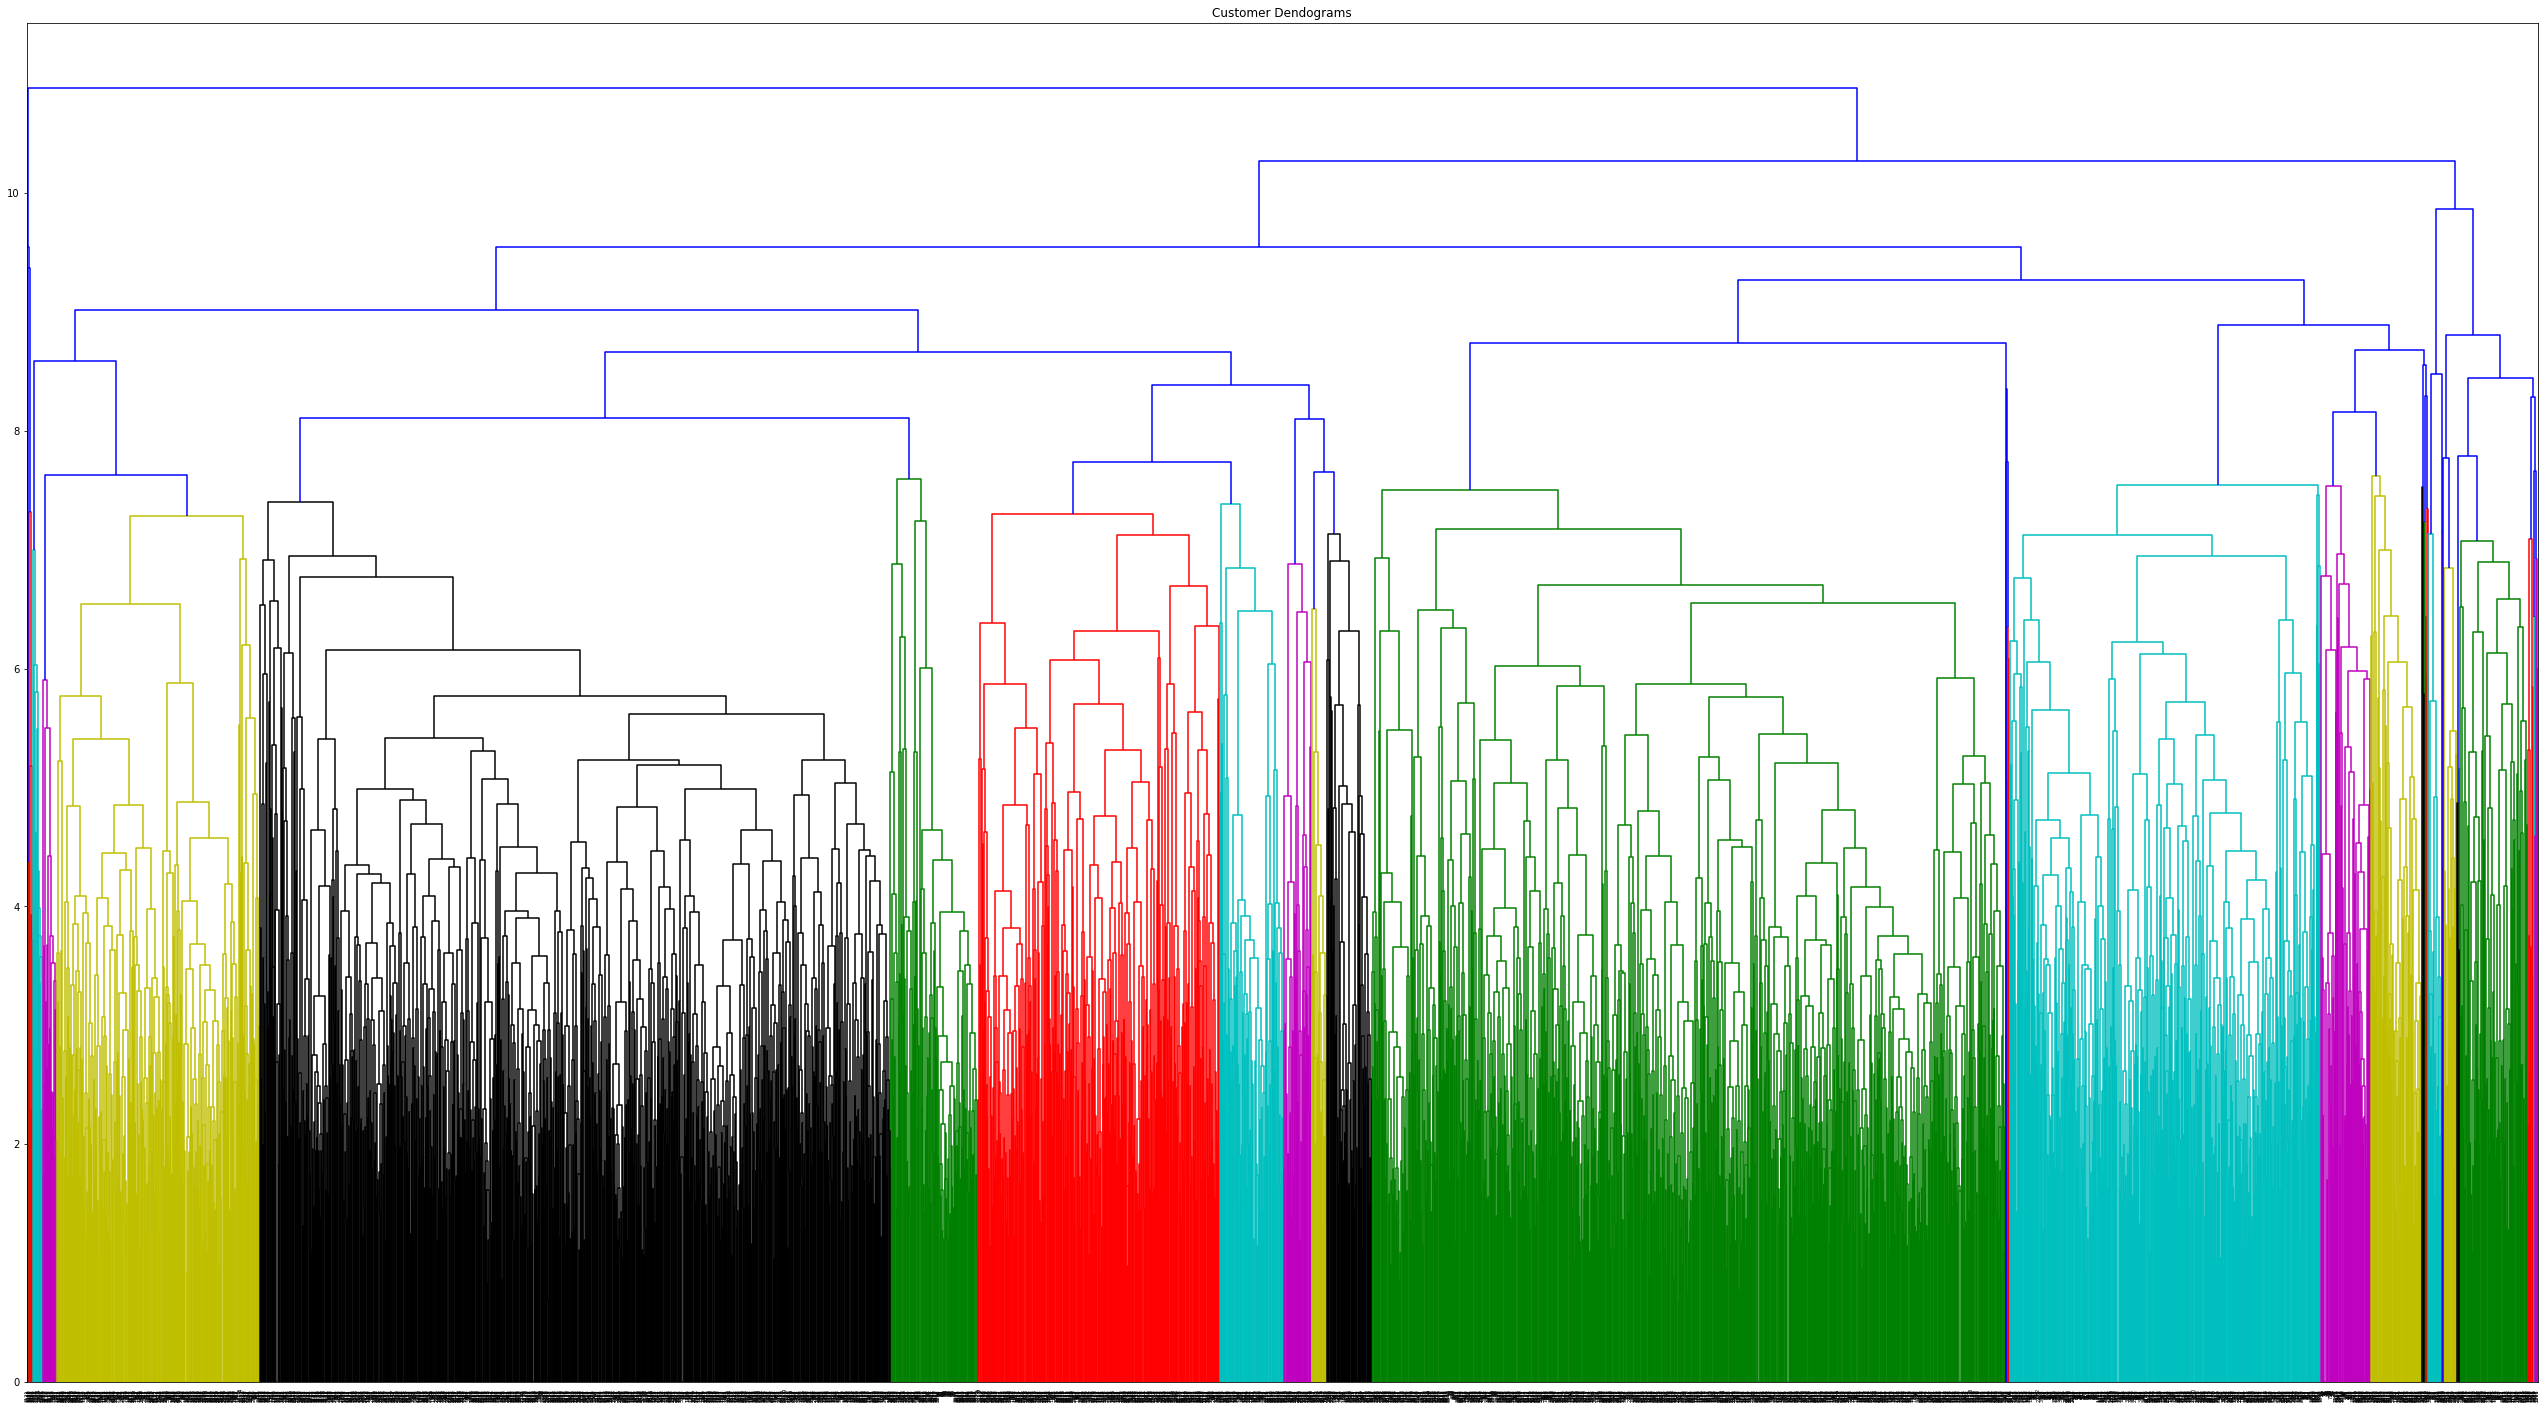

In [4]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt 
data = X
max_d = 50

plt.figure(figsize=(45, 25))  
plt.title("Customer Dendograms")  
plt.axhline(y=max_d, c='k')
Z = shc.linkage(data, method='complete')
dend = shc.dendrogram(Z)  


## Elbow Method

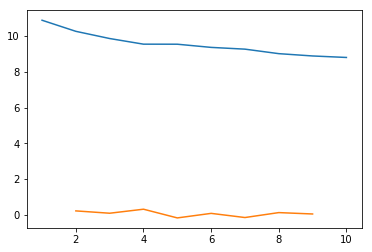

clusters: 4


In [5]:
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)

## Apply Agglomerative Clustering

Line 1 -> 7 classes  
Line 2 -> 14 classes  
Line 3 -> 22 classes  
Line 4 -> 33 classes 

In [4]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')  
result_labels = cluster.fit_predict(X) 

In [10]:
with open("./c9-agl/cl9.tsv", "w") as f:
    strline = ""
    for elem in result_labels:
        strline +=  (str(elem+10) + "\n")
    print(str(strline), file=f)
    
print(result_labels) 

[4 6 4 ... 2 4 0]


## Pentru Tensorboard

In [6]:
pca = sklearnPCA(n_components=20) #2-dimensional PCA
pca_df = pd.DataFrame(pca.fit_transform(X))
df_pca = pca_df.values

tf_data = tf.Variable(df_pca)

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
PATH = os.getcwd()

LOG_DIR = PATH + '/c9-agl/'

metadata = os.path.join(LOG_DIR, 'cl9.tsv')

pca = sklearnPCA(n_components=50) #2-dimensional PCA
pca_df = pd.DataFrame(pca.fit_transform(X))
df_pca = pca_df.values

tf_data = tf.Variable(df_pca)

with tf.Session() as sess:
    saver = tf.train.Saver([tf_data])
    sess.run(tf.global_variables_initializer())
    saver.save(sess, os.path.join(LOG_DIR, 'tf_data.ckpt'))
    config = projector.ProjectorConfig()
    
    embedding = config.embeddings.add()
    embedding.tensor_name = tf_data.name
    
    embedding.metadata_path = metadata
    
    projector.visualize_embeddings(tf.summary.FileWriter(LOG_DIR), config)

## Write clusters to files

In [19]:
nrClusters = 14
folderName = "./c14/"

for i in range(10, 10 + nrClusters):
    fileName = folderName + "cluster" + str(i) + ".json"
    currentCluster = []
    w = open(fileName,'w',encoding='utf-8')
    
    for j in range(0,len(result_labels)):
        if result_labels[j] == i - 10:
            w.write(str(new_sentences[j]))
            w.write('\n')

    print(len(currentCluster))
    
    w.close()

0
0
0
0
0
0
0
0
0
0
0
0
0
0


Automatically created module for IPython interactive environment
For n_clusters = 300 The average silhouette_score is : 0.06162805760841822
For n_clusters = 301 The average silhouette_score is : 0.061384212549984676
For n_clusters = 302 The average silhouette_score is : 0.059612165686649905
For n_clusters = 303 The average silhouette_score is : 0.06213476675057143
For n_clusters = 304 The average silhouette_score is : 0.06353226467526497


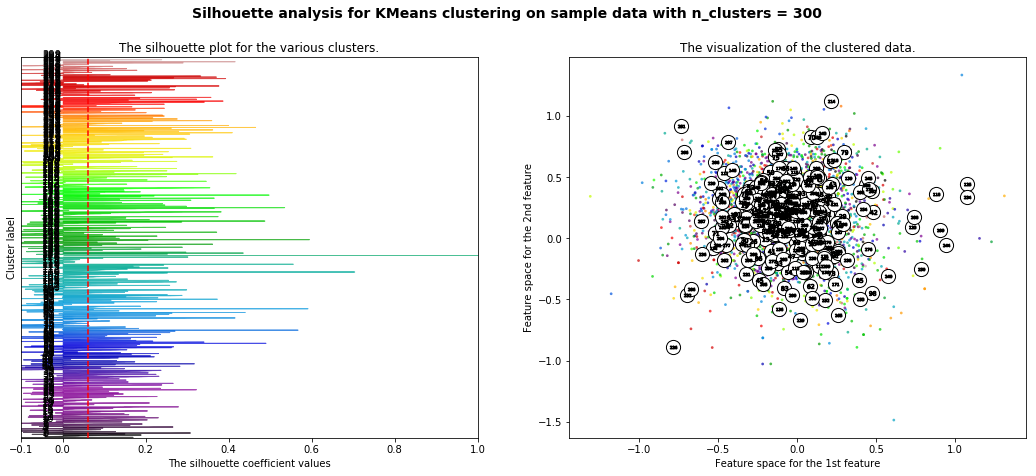

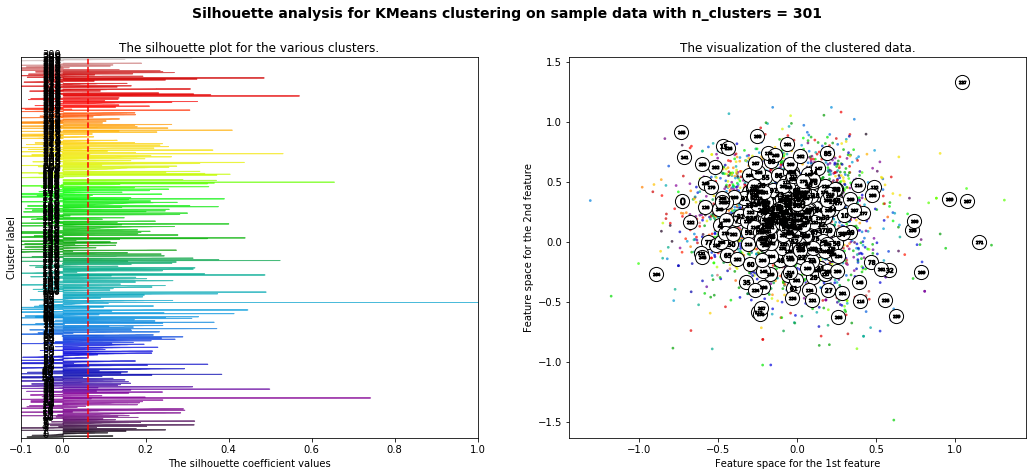

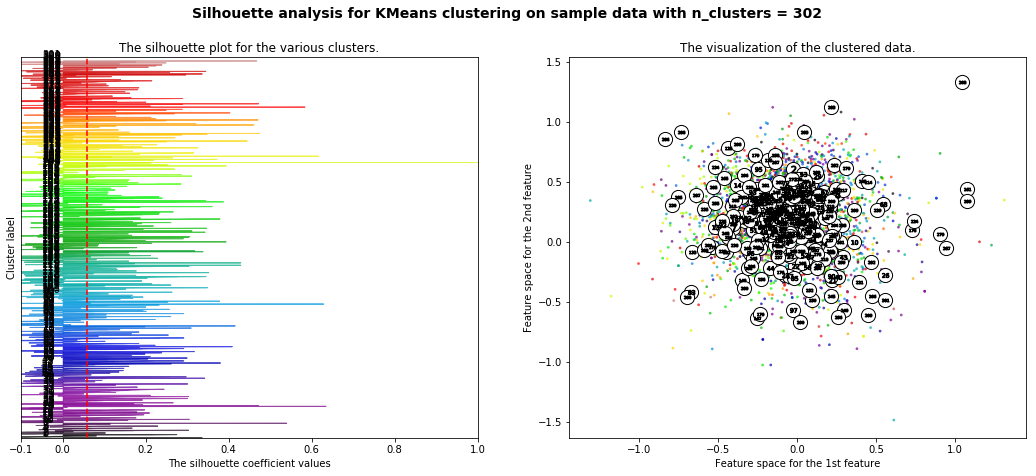

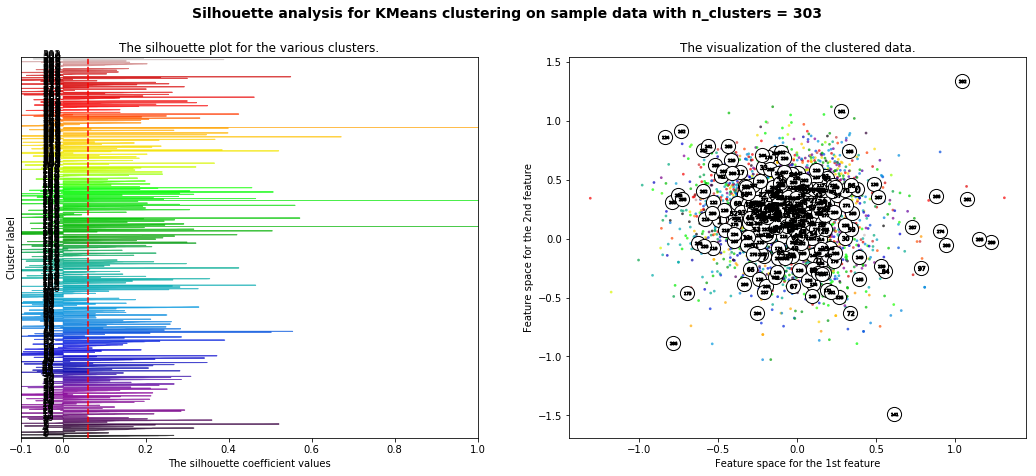

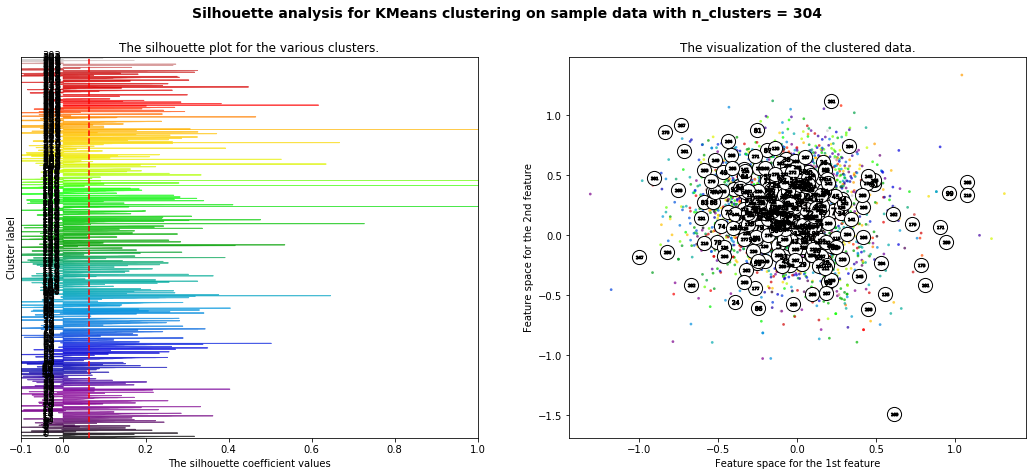

In [14]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
# X, y = make_blobs(n_samples=500,
#                   n_features=2,
#                   centers=4,
#                   cluster_std=1,
#                   center_box=(-10.0, 10.0),
#                   shuffle=True,
#                   random_state=1)  # For reproducibility

#range_n_clusters = [72, 73, 74, 75, 76]

for n_clusters in range(300,305):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [28]:
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.kmeans import kmeans
from pyclustering.cluster.silhouette import silhouette_ksearch_type, silhouette_ksearch
from pyclustering.samples.definitions import FCPS_SAMPLES

sample = X
print(len(sample))
search_instance = silhouette_ksearch(sample, 2, 35, algorithm=silhouette_ksearch_type.KMEANS).process()
amount = search_instance.get_amount()
scores = search_instance.get_scores()
for i in range(2,31):
    print("Score " + str(i) + " " + str(scores[i]))
initial_centers = kmeans_plusplus_initializer(sample, amount).initialize()
kmeans_instance = kmeans(sample, initial_centers).process()
clusters = kmeans_instance.get_clusters()

3593
Score 2 0.0522878504622109
Score 3 0.0981719982752197
Score 4 0.07831529991761059
Score 5 0.06750367413779747
Score 6 0.07131989347586565
Score 7 0.06554626364183691
Score 8 0.07100723148453839
Score 9 0.06813138703057393
Score 10 0.059679878951716114
Score 11 0.06376174717596354
Score 12 0.056689073988015815
Score 13 0.06163832792910244
Score 14 0.054938271128485816
Score 15 0.05297839162179975
Score 16 0.05112202875001813
Score 17 0.05469647026838551
Score 18 0.04872838595145362
Score 19 nan
Score 20 0.05730065635812418
Score 21 0.05472557171740518
Score 22 0.056769247821225215
Score 23 0.05547090541305166
Score 24 0.059196420332990524
Score 25 0.05889432550456664
Score 26 0.05534531764308548
Score 27 0.0560228632966655
Score 28 nan
Score 29 nan
Score 30 nan
